# CZ gate  numerical simulation for realistic setups

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import sage.all as sg
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
import numpy as np
import SuperoperatorSimulations
from importlib import reload  
simulations  = reload(SuperoperatorSimulations)
sim = simulations.Simulation('O-x-O')

/home/yorgos/.local/lib/python3.8/site-packages/qutip/__init__.py:91: UserWarning: Old version of Cython detected: needed 0.29.20, got 0.29.14.
  warnings.warn(


Initializing system O-x-O  ...
Constructing states and excitations...
Constructing ground and first-excited statespace...
Constructing gs_hamiltonian ...
Constructing e1_hamiltonian ...
Constructing interactions V_plus and V_minus ...
Constructing NJ_hamiltonian  ...
Inverting NJ_hamiltonian  ...


Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/history.py", line 576, in end_session
    self.db.execute("""UPDATE sessions SET end=?, num_cmds=? WHERE
sqlite3.OperationalError: disk I/O error


Constructing eff_hamiltonian and effective lindblad operators ...

System  O-x-O  initialized in 30.3 seconds.
Getting Lindblad Operators


# Run simulation varying $\Delta_e$ 

<>:36: DeprecationWarning: invalid escape sequence \%
<>:37: DeprecationWarning: invalid escape sequence \%
<>:36: DeprecationWarning: invalid escape sequence \%
<>:37: DeprecationWarning: invalid escape sequence \%
/tmp/ipykernel_5591/1397611974.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  Pfail[i] = f_prob


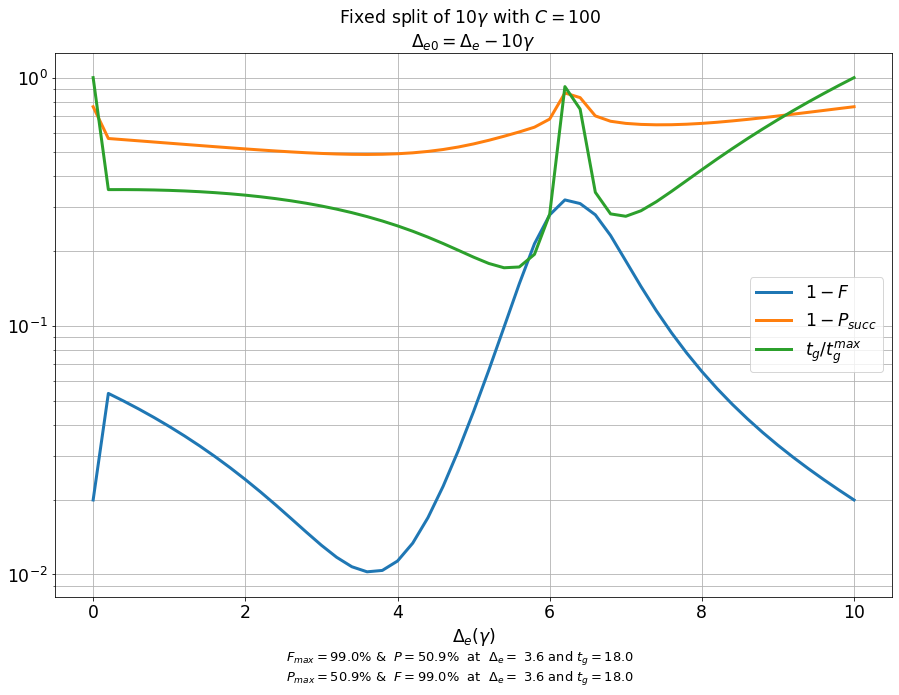

In [8]:
C_val = 100
gamma_val = sim.parameters['gamma']
max_split = 10 * gamma_val
DeSweep = np.linspace(0,max_split , num = 51)
Pfail = np.zeros_like(DeSweep)
Infidelity =  np.zeros_like(DeSweep)
GateTime =  np.zeros_like(DeSweep)
#c_val = 9/4
#sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )
for (i,De_val) in enumerate(DeSweep):
    if De_val>0:
        De0_val =   -max_split + De_val
    else:
        De0_val =   max_split + De_val
    sim.parameters['De']  = De_val
    sim.parameters['De0'] = De0_val
    sim.Numerical_Substitution()
    gate_time, f_prob , infidelity = sim.Simulate(C_val)
    
    GateTime[i] = gate_time
    Pfail[i] = f_prob
    Infidelity[i] = infidelity

InfidMinArg = np.argmin(Infidelity)
P_failMinArg = np.argmin(Pfail)

plt.title(f"Fixed split of ${max_split}"+r"\gamma$" +f" with $C={C_val}$  \n" +r"$\Delta_{e0} = \Delta_e -$"+f"${max_split}"+r"\gamma$")#
plt.plot(DeSweep,Infidelity,linewidth=3.0,label=r"$1-F$")
plt.plot(DeSweep,Pfail,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(DeSweep,GateTime/np.max(GateTime),linewidth=3.0,label=r"$t_g / t_g^{max}$")
plt.xlabel(r"$\Delta_e (\gamma)$")
#plt.ylim(-0.01,1.02)
plt.yscale('log')
plt.grid(which='both')
plt.legend()
txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/DeSweepSpl{max_split}_C{C_val}.svg')

        

# Make heatmap out of MaxSplitting and C_sweeping

## With $c = C$

### Simulate

In [2]:
sim.Create_Parameter_Dict()
gamma_val = sim.parameters['gamma']


SplitSweep = [3,5,10,15]
CSweep = [10 , 25, 50 , 100, 200]

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:
    ResultsMixed.append([])
    ResultsP.append([])
    ResultsF.append([])
    for split in SplitSweep:
        max_split = split * gamma_val
        DeSweep = np.linspace(0,max_split , num = 51)
        Psucc = np.zeros_like(DeSweep)
        Fidelity =  np.zeros_like(DeSweep)
        GateTime =  np.zeros_like(DeSweep)
        for (i,De_val) in enumerate(DeSweep):
            De0_val =  De_val - max_split
            
            sim.parameters['De']  = De_val
            sim.parameters['De0'] = De0_val

            sim.Numerical_Substitution()
            gate_time, f_prob , infidelity = sim.Simulate(C_val)

            GateTime[i] = gate_time
            Psucc[i] = 1-f_prob
            Fidelity[i] = 1-infidelity

        argmax = np.argmax(Psucc*Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsMixed[-1].append(res)

        argmax = np.argmax(Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsF[-1].append(res)

        argmax = np.argmax(Psucc)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsP[-1].append(res)

        

<ipython-input-2-8822e3a3e0d6>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


KeyboardInterrupt: 

### Plot

<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%
<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%


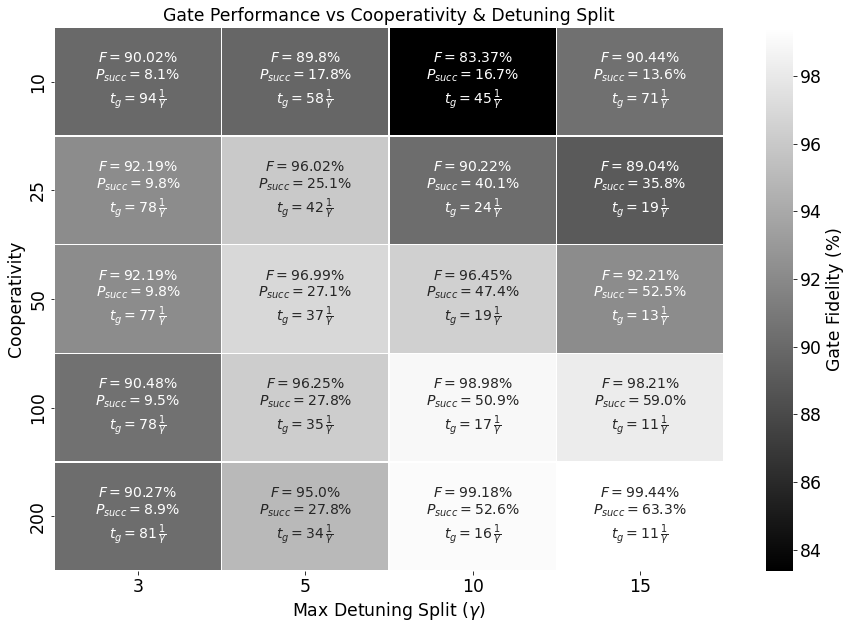

In [61]:
import seaborn as sns
import matplotlib.pylab as plt

Results = ResultsMixed

AllLabels = [["" for i in range(len(SplitSweep))]for j in range(len(CSweep))]

Fid = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Fid[i][j]= Results[i][j]['Fidelity']
        AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'

Ps = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Ps[i][j]= Results[i][j]['Psucc']
        AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'


Tg = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Tg[i][j]= Results[i][j]['GateTime']
        AllLabels[i][j] += '$t_g='+ str(int(Tg[i][j]))+r' \,\frac{1}{\gamma}$'

fig, ax = plt.subplots()


ax = sns.heatmap(Fid*100,yticklabels=CSweep,xticklabels=SplitSweep,cmap='gray', linewidth=0.5,annot=AllLabels, fmt = ''\
    ,cbar_kws={'label': 'Gate Fidelity (%)'}, annot_kws={"size": 14}) #Greys
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(r'Gate Performance vs Cooperativity & Detuning Split')
plt.show() 
figure = ax.get_figure()
figure.savefig(f'plots/All_heatmapMixedmax.svg')

## With $c$ : a function of coupling efficiency

### Simulate

In [ ]:
# Input coupling efficiency
k = 0.99
c_val = k/ (4-4*k)
sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )

gamma_val = sim.parameters['gamma']
SplitSweep = [3,5,10,15]
CSweep = [10 , 25, 50 , 100, 200]

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:
    print(f"C={C_val}", end ='  ')
    ResultsMixed.append([])
    ResultsP.append([])
    ResultsF.append([])
    for split in SplitSweep:
        max_split = split * gamma_val
        DeSweep = np.linspace(0,max_split , num = 51)
        Psucc = np.zeros_like(DeSweep)
        Fidelity =  np.zeros_like(DeSweep)
        GateTime =  np.zeros_like(DeSweep)
        for (i,De_val) in enumerate(DeSweep):
            De0_val =  De_val - max_split
            
            sim.parameters['De']  = De_val
            sim.parameters['De0'] = De0_val

            sim.Numerical_Substitution()
            gate_time, f_prob , infidelity = sim.Simulate(C_val)

            GateTime[i] = gate_time
            Psucc[i] = 1-f_prob
            Fidelity[i] = 1-infidelity

        argmax = np.argmax(Psucc*Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsMixed[-1].append(res)

        argmax = np.argmax(Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsF[-1].append(res)

        argmax = np.argmax(Psucc)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsP[-1].append(res)


### Plot

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

Results = ResultsMixed

AllLabels = [["" for i in range(len(SplitSweep))]for j in range(len(CSweep))]

Fid = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Fid[i][j]= Results[i][j]['Fidelity']
        AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'

Ps = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Ps[i][j]= Results[i][j]['Psucc']
        AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'


Tg = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Tg[i][j]= Results[i][j]['GateTime']
        AllLabels[i][j] += '$t_g='+ str(int(Tg[i][j]))+r' \,\frac{1}{\gamma}$'

fig, ax = plt.subplots()


ax = sns.heatmap(Fid*100,yticklabels=CSweep,xticklabels=SplitSweep,cmap='gray', linewidth=0.5,annot=AllLabels, fmt = ''\
    ,cbar_kws={'label': 'Gate Fidelity (%)'}, annot_kws={"size": 14}) #Greys
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split for $k={int(k*100)}\%$')
plt.show() 
figure = ax.get_figure()
figure.savefig(f'plots/All_heatmapMixedmaxk{k}.svg')

C=10  

<ipython-input-10-9007ef22c3ba>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


C=25  C=50  C=100  C=200  

## With varying $\gamma_g$

### Simulate

In [12]:
sim.Create_Parameter_Dict()
gamma_val = sim.parameters['gamma']

sim.parameters['gamma_g']  = gamma_val*0.01
sim.parameters['gamma_f']  = gamma_val*0.99

SplitSweep = [3,5,10,15]
CSweep = [10 , 25, 50 , 100, 200]

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:
    ResultsMixed.append([])
    ResultsP.append([])
    ResultsF.append([])
    for split in SplitSweep:
        max_split = split * gamma_val
        DeSweep = np.linspace(0,max_split , num = 51)
        Psucc = np.zeros_like(DeSweep)
        Fidelity =  np.zeros_like(DeSweep)
        GateTime =  np.zeros_like(DeSweep)
        for (i,De_val) in enumerate(DeSweep):
            De0_val =  De_val - max_split
            
            sim.parameters['De']  = De_val
            sim.parameters['De0'] = De0_val

            sim.Numerical_Substitution()
            gate_time, f_prob , infidelity = sim.Simulate(C_val)

            GateTime[i] = gate_time
            Psucc[i] = 1-f_prob
            Fidelity[i] = 1-infidelity

        argmax = np.argmax(Psucc*Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsMixed[-1].append(res)

        argmax = np.argmax(Fidelity)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsF[-1].append(res)

        argmax = np.argmax(Psucc)        
        Fid = Fidelity[argmax]
        Ps =  Psucc[argmax]
        tg = GateTime[argmax]
        res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
        ResultsP[-1].append(res)

        

<ipython-input-12-641952430478>:33: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


### Plot

<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%
<>:34: DeprecationWarning: invalid escape sequence \g
<>:34: DeprecationWarning: invalid escape sequence \g
<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%
<>:34: DeprecationWarning: invalid escape sequence \g
<>:34: DeprecationWarning: invalid escape sequence \g
<ipython-input-17-77850d583c05>:12: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'
<ipython-input-17-77850d583c05>:18: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'
<ipython-input-17-77850d583c05>:34: DeprecationWarning: invalid escape sequence \g
  ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split with $\gamma_g={ sim.parameters["gamma_g"] }\gamma$')
<ipython-

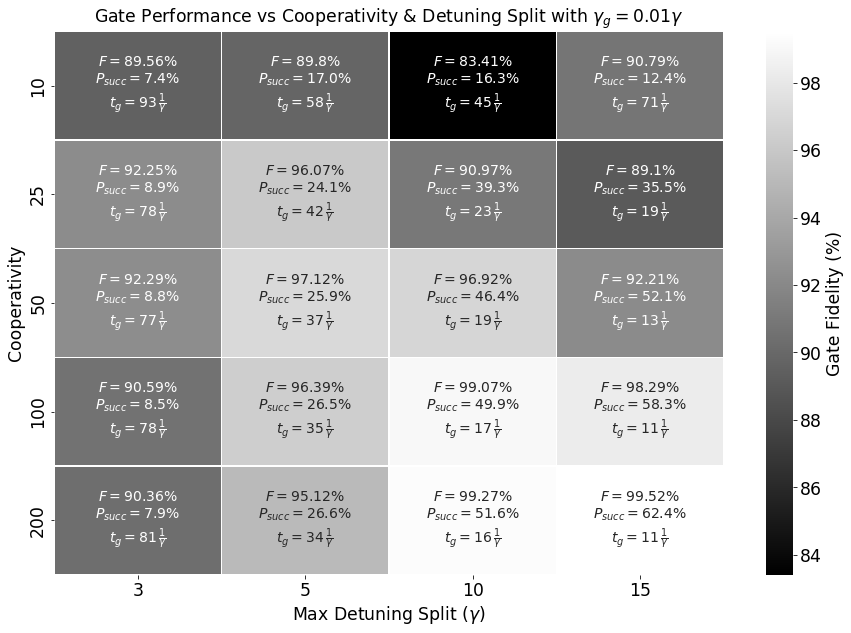

In [17]:
import seaborn as sns
import matplotlib.pylab as plt

Results = ResultsMixed

AllLabels = [["" for i in range(len(SplitSweep))]for j in range(len(CSweep))]

Fid = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Fid[i][j]= Results[i][j]['Fidelity']
        AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'

Ps = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Ps[i][j]= Results[i][j]['Psucc']
        AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'


Tg = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Tg[i][j]= Results[i][j]['GateTime']
        AllLabels[i][j] += '$t_g='+ str(int(Tg[i][j]))+r' \,\frac{1}{\gamma}$'

fig, ax = plt.subplots()


ax = sns.heatmap(Fid*100,yticklabels=CSweep,xticklabels=SplitSweep,cmap='gray', linewidth=0.5,annot=AllLabels, fmt = ''\
    ,cbar_kws={'label': 'Gate Fidelity (%)'}, annot_kws={"size": 14}) #Greys
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split with $\gamma_g={ sim.parameters["gamma_g"] }\gamma$')
plt.show() 
figure = ax.get_figure()
figure.savefig(f'plots/All_heatmapMixedmax{0.01}g.svg')

<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%
<>:34: DeprecationWarning: invalid escape sequence \%
<>:12: DeprecationWarning: invalid escape sequence \%
<>:18: DeprecationWarning: invalid escape sequence \%
<>:34: DeprecationWarning: invalid escape sequence \%
<ipython-input-11-74c826249397>:12: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'
<ipython-input-11-74c826249397>:18: DeprecationWarning: invalid escape sequence \%
  AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'
<ipython-input-11-74c826249397>:34: DeprecationWarning: invalid escape sequence \%
  ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split for $k={int(k*100)}\%$')


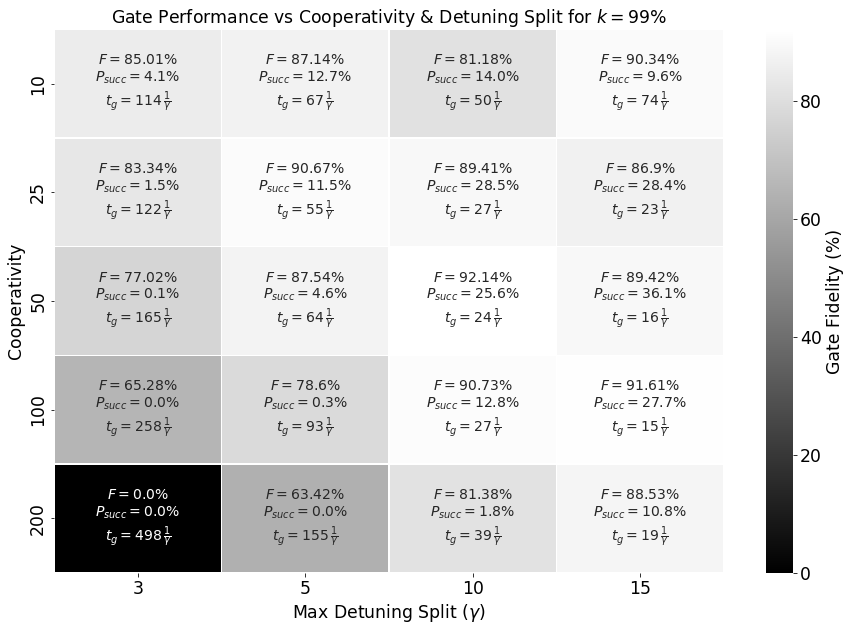

In [11]:
import seaborn as sns
import matplotlib.pylab as plt

Results = ResultsMixed

AllLabels = [["" for i in range(len(SplitSweep))]for j in range(len(CSweep))]

Fid = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Fid[i][j]= Results[i][j]['Fidelity']
        AllLabels[i][j] += '$F='+ str(np.round(Results[i][j]['Fidelity']*100,decimals=2))+'\%$\n'

Ps = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Ps[i][j]= Results[i][j]['Psucc']
        AllLabels[i][j] += '$P_{succ}='+ str(np.round(Results[i][j]['Psucc']*100,decimals=1))+'\%$\n'


Tg = np.zeros((len(CSweep),len(SplitSweep)))
for i in range(len(CSweep)):
    for j in range(len(SplitSweep)):
        Tg[i][j]= Results[i][j]['GateTime']
        AllLabels[i][j] += '$t_g='+ str(int(Tg[i][j]))+r' \,\frac{1}{\gamma}$'

fig, ax = plt.subplots()


ax = sns.heatmap(Fid*100,yticklabels=CSweep,xticklabels=SplitSweep,cmap='gray', linewidth=0.5,annot=AllLabels, fmt = ''\
    ,cbar_kws={'label': 'Gate Fidelity (%)'}, annot_kws={"size": 14}) #Greys
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(f'Gate Performance vs Cooperativity & Detuning Split for $k={int(k*100)}\%$')
plt.show() 
figure = ax.get_figure()
figure.savefig(f'plots/All_heatmapMixedmaxk{k}.svg')

# $c$ simulations varying C

In [63]:
sim.Create_Parameter_Dict()#reset values 

gamma_val = sim.parameters['gamma']

# Input coupling efficiency
k = 0.95
c_val = k/ (4-4*k)
sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )

CSweep = [20,40]#np.linspace(1,40,21)
split = 10


max_split = split * gamma_val

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:

    DeSweep = np.linspace(0,max_split , num = 21)
    Psucc = np.zeros_like(DeSweep)
    Fidelity =  np.zeros_like(DeSweep)
    GateTime =  np.zeros_like(DeSweep)
    for (i,De_val) in enumerate(DeSweep):
        De0_val =  De_val - max_split
        
        sim.parameters['De']  = De_val
        sim.parameters['De0'] = De0_val

        sim.Numerical_Substitution()
        gate_time, f_prob , infidelity = sim.Simulate(C_val)

        GateTime[i] = gate_time
        Psucc[i] = 1-f_prob
        Fidelity[i] = 1-infidelity

    argmax = np.argmax(Psucc*Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsMixed.append(res)

    argmax = np.argmax(Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsF.append(res)

    argmax = np.argmax(Psucc)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsP.append(res)

        

<ipython-input-63-4a39f7d12b3d>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


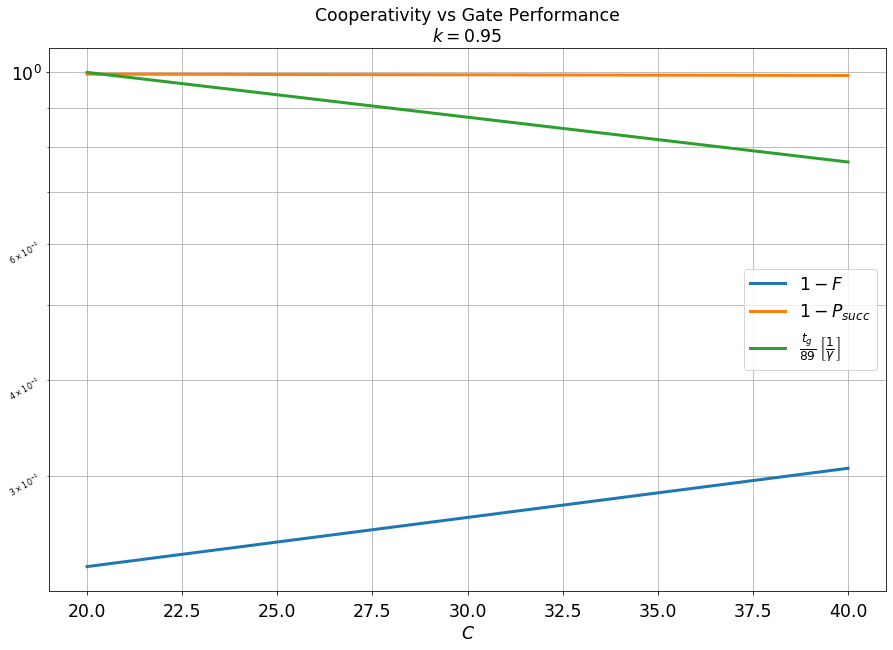

In [65]:
Results = ResultsF


Fid = np.zeros((len(CSweep)))
Ps = np.zeros((len(CSweep)))
Tg = np.zeros((len(CSweep)))
for i in range(len(CSweep)):
    Fid[i] = Results[i]['Fidelity']
    Ps[i]  = Results[i]['Psucc']
    Tg[i]  = Results[i]['GateTime']
    




plt.title(f"Cooperativity vs Gate Performance\n$k={k}$")#
plt.plot(CSweep,1-Fid,linewidth=3.0,label=r"$1-F$")
plt.plot(CSweep,1-Ps,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(CSweep,Tg/np.max(Tg),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(Tg)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.xlabel(r"$C$")
def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax = plt.gca()
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.yscale('log')
plt.grid(which='both')
plt.legend()

#txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
#r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/CSweep_Spl{max_split}_k{k}.svg')
plt.show()

        

<ipython-input-55-5f6bdc43f750>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


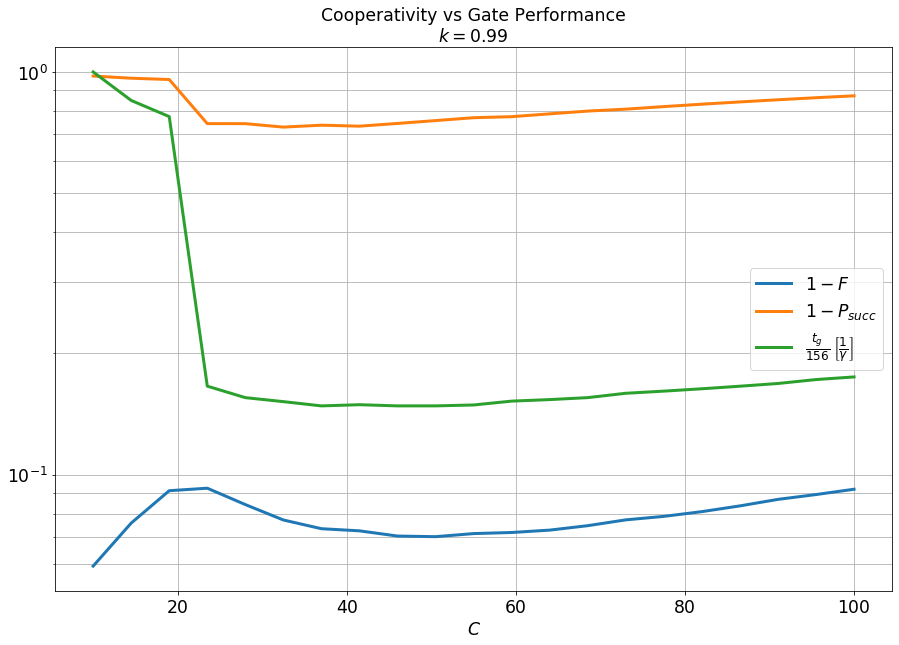

In [55]:
sim.Create_Parameter_Dict()#reset values 

gamma_val = sim.parameters['gamma']

# Input coupling efficiency
k = 0.99
c_val = k/ (4-4*k)
sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )

CSweep = np.linspace(10,100,21)
split = 10


max_split = split * gamma_val

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:

    DeSweep = np.linspace(0,max_split , num = 21)
    Psucc = np.zeros_like(DeSweep)
    Fidelity =  np.zeros_like(DeSweep)
    GateTime =  np.zeros_like(DeSweep)
    for (i,De_val) in enumerate(DeSweep):
        De0_val =  De_val - max_split
        
        sim.parameters['De']  = De_val
        sim.parameters['De0'] = De0_val

        sim.Numerical_Substitution()
        gate_time, f_prob , infidelity = sim.Simulate(C_val)

        GateTime[i] = gate_time
        Psucc[i] = 1-f_prob
        Fidelity[i] = 1-infidelity

    argmax = np.argmax(Psucc*Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsMixed.append(res)

    argmax = np.argmax(Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsF.append(res)

    argmax = np.argmax(Psucc)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsP.append(res)

Results = ResultsF


Fid = np.zeros((len(CSweep)))
Ps = np.zeros((len(CSweep)))
Tg = np.zeros((len(CSweep)))
for i in range(len(CSweep)):
    Fid[i] = Results[i]['Fidelity']
    Ps[i]  = Results[i]['Psucc']
    Tg[i]  = Results[i]['GateTime']
    




plt.title(f"Cooperativity vs Gate Performance\n$k={k}$")#
plt.plot(CSweep,1-Fid,linewidth=3.0,label=r"$1-F$")
plt.plot(CSweep,1-Ps,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(CSweep,Tg/np.max(Tg),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(Tg)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.xlabel(r"$C$")
def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax = plt.gca()
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.yscale('log')
plt.grid(which='both')
plt.legend()

#txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
#r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/CSweep_Spl{max_split}_k{k}.svg')
plt.show()

In [56]:

sim.Create_Parameter_Dict()#reset values 

gamma_val = sim.parameters['gamma']

# Input coupling efficiency
k = 0.995
c_val = k/ (4-4*k)
sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )

CSweep = np.linspace(10,200,21)
split = 10


max_split = split * gamma_val

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:

    DeSweep = np.linspace(0,max_split , num = 21)
    Psucc = np.zeros_like(DeSweep)
    Fidelity =  np.zeros_like(DeSweep)
    GateTime =  np.zeros_like(DeSweep)
    for (i,De_val) in enumerate(DeSweep):
        De0_val =  De_val - max_split
        
        sim.parameters['De']  = De_val
        sim.parameters['De0'] = De0_val

        sim.Numerical_Substitution()
        gate_time, f_prob , infidelity = sim.Simulate(C_val)

        GateTime[i] = gate_time
        Psucc[i] = 1-f_prob
        Fidelity[i] = 1-infidelity

    argmax = np.argmax(Psucc*Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsMixed.append(res)

    argmax = np.argmax(Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsF.append(res)

    argmax = np.argmax(Psucc)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsP.append(res)

Results = ResultsF


Results = ResultsF


Fid = np.zeros((len(CSweep)))
Ps = np.zeros((len(CSweep)))
Tg = np.zeros((len(CSweep)))
for i in range(len(CSweep)):
    Fid[i] = Results[i]['Fidelity']
    Ps[i]  = Results[i]['Psucc']
    Tg[i]  = Results[i]['GateTime']
    




plt.title(f"Cooperativity vs Gate Performance\n$k={k}$")#
plt.plot(CSweep,1-Fid,linewidth=3.0,label=r"$1-F$")
plt.plot(CSweep,1-Ps,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(CSweep,Tg/np.max(Tg),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(Tg)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.xlabel(r"$C$")
def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax = plt.gca()
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.yscale('log')
plt.grid(which='both')
plt.legend()

#txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
#r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/CSweep_Spl{max_split}_k{k}.svg')
plt.show()

<ipython-input-56-ee72085971f6>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


KeyboardInterrupt: 

<ipython-input-52-cdd4234fa40f>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  Psucc[i] = 1-f_prob


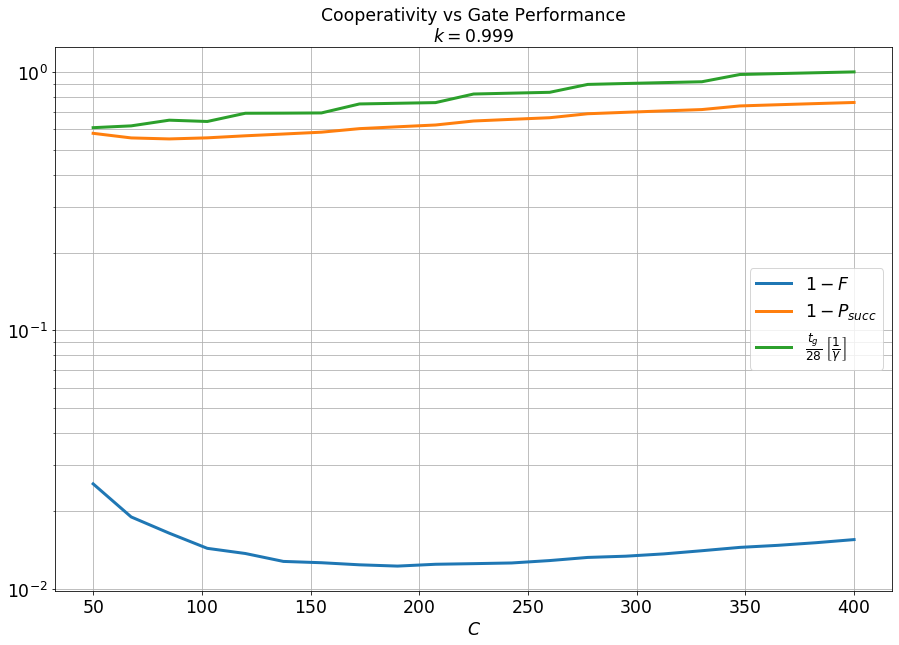

In [ ]:
sim.Create_Parameter_Dict()#reset values 

gamma_val = sim.parameters['gamma']

# Input coupling efficiency
k = 0.999
c_val = k/ (4-4*k)
sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )

CSweep = np.linspace(10,400,21)
split = 10


max_split = split * gamma_val

ResultsMixed = []
ResultsF = []
ResultsP = []
for C_val in CSweep:

    DeSweep = np.linspace(0,max_split , num = 21)
    Psucc = np.zeros_like(DeSweep)
    Fidelity =  np.zeros_like(DeSweep)
    GateTime =  np.zeros_like(DeSweep)
    for (i,De_val) in enumerate(DeSweep):
        De0_val =  De_val - max_split
        
        sim.parameters['De']  = De_val
        sim.parameters['De0'] = De0_val

        sim.Numerical_Substitution()
        gate_time, f_prob , infidelity = sim.Simulate(C_val)

        GateTime[i] = gate_time
        Psucc[i] = 1-f_prob
        Fidelity[i] = 1-infidelity

    argmax = np.argmax(Psucc*Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsMixed.append(res)

    argmax = np.argmax(Fidelity)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsF.append(res)

    argmax = np.argmax(Psucc)        
    Fid = Fidelity[argmax]
    Ps =  Psucc[argmax]
    tg = GateTime[argmax]
    res = {"Fidelity":Fid,"Psucc":Ps,"GateTime":tg}
    ResultsP.append(res)

Results = ResultsF


Results = ResultsF


Fid = np.zeros((len(CSweep)))
Ps = np.zeros((len(CSweep)))
Tg = np.zeros((len(CSweep)))
for i in range(len(CSweep)):
    Fid[i] = Results[i]['Fidelity']
    Ps[i]  = Results[i]['Psucc']
    Tg[i]  = Results[i]['GateTime']
    




plt.title(f"Cooperativity vs Gate Performance\n$k={k}$")#
plt.plot(CSweep,1-Fid,linewidth=3.0,label=r"$1-F$")
plt.plot(CSweep,1-Ps,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(CSweep,Tg/np.max(Tg),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(Tg)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.xlabel(r"$C$")
def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax = plt.gca()
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.yscale('log')
plt.grid(which='both')
plt.legend()

#txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
#r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/CSweep_Spl{max_split}_k{k}.svg')
plt.show()

# Testing Symmetry of $\Delta_e \quad \& \quad \Delta_{e0}$

In [1]:
C_val = 100
gamma_val = sim.parameters['gamma']
max_split = 10 * gamma_val
DeSweep = np.linspace(-max_split,max_split , num = 201)
Pfail = np.zeros_like(DeSweep)
Infidelity =  np.zeros_like(DeSweep)
GateTime =  np.zeros_like(DeSweep)
#c_val = 9/4
#sim.parameters['v'] = np.sqrt( c_val * (sim.parameters['kappa_b']*sim.parameters['kappa_c'] ) )
for (i,De_val) in enumerate(DeSweep):
    if De_val>0:
        De0_val =   -max_split + De_val
    else:
        De0_val =   max_split + De_val
    sim.parameters['De']  = De_val
    sim.parameters['De0'] = De0_val
    sim.Numerical_Substitution()
    gate_time, f_prob , infidelity = sim.Simulate(C_val)
    
    GateTime[i] = gate_time
    Pfail[i] = f_prob
    Infidelity[i] = infidelity
InfidMinArg = np.argmin(Infidelity)
P_failMinArg = np.argmin(Pfail)


plt.title(f"Fixed split of ${max_split}"+r"\gamma$" +f" with $C={C_val}$  \n" +r"$|\Delta_{e0} - \Delta_e| =$"+f"${max_split}"+r"\gamma$")#
plt.plot(DeSweep,Infidelity,linewidth=3.0,label=r"$1-F$")
plt.plot(DeSweep,Pfail,linewidth=3.0,label=r"$1-P_{succ}$")
plt.plot(DeSweep,GateTime/np.max(GateTime),linewidth=3.0,label=r"$\frac{t_g}{"+str(np.round(np.max(GateTime)))+r"}\left[\frac{1}{\gamma}\right]$")
#plt.plot(DeSweep,Pfail,linewidth=3.0,label=r"$1-P_{succ}$")
plt.xlabel(r"$\Delta_e (\gamma)$")
#plt.ylim(-0.01,1.02)
plt.yscale('log')
plt.grid(which='both')
plt.legend()
txt=r"$F_{max} = $" + f'{100*np.round(1-np.min(Infidelity),decimals=3)}% &  $P={np.round(100*(1-Pfail[InfidMinArg]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[InfidMinArg],decimals=2)} and $t_g = {np.round(GateTime[InfidMinArg])}$ \n' \
r"$P_{max} = $" + f'{np.round(100*(1-np.min(Pfail)),decimals=1)}% &  $F={np.round(100*(1-Infidelity[np.argmin(Pfail)]),decimals=1)}\%$  at  $\Delta_e =$ {np.round(DeSweep[np.argmin(Pfail)],decimals=2)} and $t_g = {np.round(GateTime[P_failMinArg])}$ '
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=13)
plt.savefig(f'plots/DeSweepABSF{max_split}_C{C_val}.svg')

NameError: name 'sim' is not defined

In [19]:
AllLabels[0][0]

''

# Legacy

In [ ]:
ax = sns.heatmap(Infid,yticklabels=CSweep,xticklabels=SplitSweep,cmap='Greys', linewidth=0.5,annot=True)
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title('$1-F$ vs Cooperativity & Detuning Split')
plt.show()
figure = ax.get_figure()    
figure.savefig(f'plots/Infid_heatmap.svg')

ax = sns.heatmap(Pf,yticklabels=CSweep,xticklabels=SplitSweep,cmap='Greys', linewidth=0.5,annot=True)
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(r'$1-P_{succ}$ vs Cooperativity & Detuning Split')
plt.show()
figure = ax.get_figure()    
figure.savefig(f'plots/Pfail_heatmap.svg')


ax = sns.heatmap(Tg,yticklabels=CSweep,xticklabels=SplitSweep,cmap='Greys', linewidth=0.5,annot=True)
ax.set_ylabel('Cooperativity')
ax.set_xlabel(r'Max Detuning Split $(\gamma)$')
ax.set_title(r'Gate Time ($1/\gamma$) vs Cooperativity & Detuning Split')
plt.show() 
figure = ax.get_figure()    
figure.savefig(f'plots/GateTime_heatmap.svg')

In [28]:
import numpy as np

k_1 = np.logspace(-3,-0.5,num =100)

c_res = []

for val_k1 in k_1:
    k_val = 1-val_k1
    c_val = k_val/(4-4*k_val)
    c_res.append(c_val)

c_res = np.array(c_res)

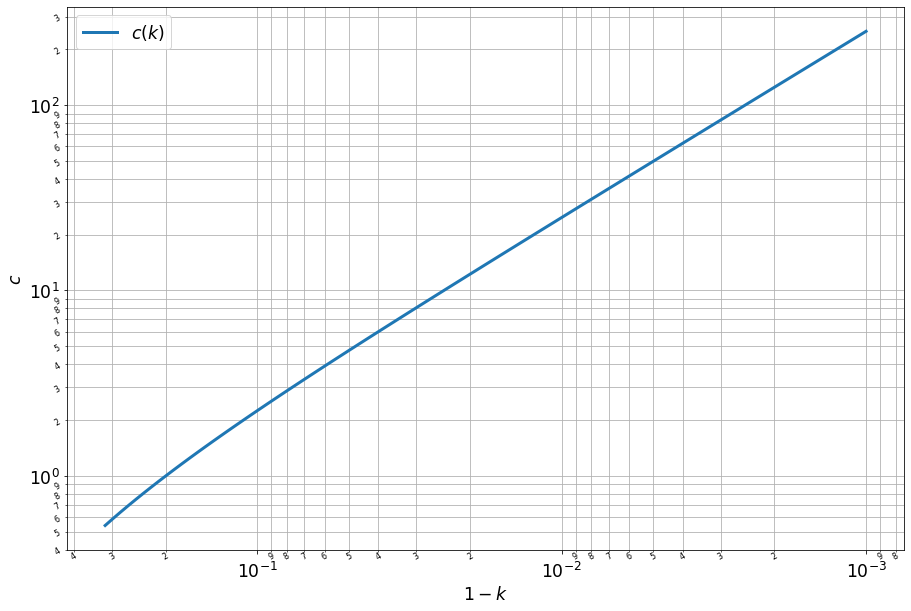

In [32]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import math
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

ax =plt.plot(k_1,c_res,linewidth=3.0,label='$c(k)$')

#plt.title(f'{sim.setup_char}\nGate Performance vs Cooperativity')
plt.xlabel('$1-k$')
plt.ylabel('$c$')
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')
plt.tick_params(axis='y', which='minor')
plt.legend()
plt.gca().invert_xaxis()
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')



def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.legend()
plt.savefig(f'plots/cooperativity_vs_k.svg')
plt.show()